In [1]:
import pandas as pd

df=pd.read_csv('/Users/mac/Downloads/fxhfjw1oixeme1ny.csv')

In [2]:
df

,GVKEY,datadate,fyear,Total Asset,Common Equity,Common Shares Outstanding,Income Before Extraordinary Items,Operating Cash Flow,Deferred Federal Taxes,Deferred Foreign Taxes,Deferred Income Taxes,Federal Income Taxes,Foreign Income Taxes,Total Income Taxes,exchg,costat,prcc_f,sic
0,1004,5/31/74,1973,31.584,14.521,1.257,2.105,NaN,NaN,NaN,0.016,1.054,0.314,1.560,11,A,10.374988,5080
1,1004,5/31/75,1974,43.353,14.299,1.239,1.866,NaN,NaN,NaN,0.017,0.871,0.255,1.285,11,A,7.249993,5080
2,1004,5/31/76,1975,43.539,15.782,1.224,1.860,NaN,NaN,NaN,0.015,1.074,0.014,1.300,11,A,9.499989,5080
3,1004,5/31/77,1976,45.550,17.252,1.233,1.801,NaN,NaN,NaN,0.210,0.736,0.219,1.360,11,A,10.874992,5080
4,1004,5/31/78,1977,56.502,18.665,1.339,2.015,NaN,NaN,NaN,0.291,1.170,0.116,1.860,11,A,10.624993,5080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25986,223732,12/31/00,2000,387.604,211.690,655.578,31.954,52.920,NaN,-5.349,-13.729,NaN,22.134,27.153,19,A,6.500000,7372
25987,223732,12/31/01,2001,490.369,233.076,132.043,33.227,92.729,NaN,3.626,-7.374,NaN,5.519,24.554,19,A,23.001000,7372
25988,224604,12/31/99,1999,261.387,139.740,17.383,24.063,20.419,NaN,0.157,1.982,NaN,1.095,9.387,19,A,17.625000,2340
25989,224604,12/31/00,2000,366.121,183.751,18.737,22.623,31.550,NaN,-0.114,1.181,NaN,3.205,4.869,19,A,14.250000,2340


In [3]:
def calculate_measures(row):
    # Measure a
    measure_a = None  # Default to None
    # Check if values are not null and not zero
    if pd.notna(row['Federal Income Taxes']) and row['Federal Income Taxes'] != 0 and \
       pd.notna(row['Foreign Income Taxes']) and row['Foreign Income Taxes'] != 0:
        measure_a = row['Federal Income Taxes'] + row['Foreign Income Taxes']
    elif pd.notna(row['Total Income Taxes']) and row['Total Income Taxes'] != 0 and \
         pd.notna(row['Deferred Income Taxes']) and row['Deferred Income Taxes'] != 0:
        measure_a = row['Total Income Taxes'] - row['Deferred Income Taxes']

    # Measure b
    measure_b = None  # Default to None
    # Check if values are not null and not zero
    if pd.notna(row['Deferred Federal Taxes']) and row['Deferred Federal Taxes'] != 0 and \
       pd.notna(row['Deferred Foreign Taxes']) and row['Deferred Foreign Taxes'] != 0:
        measure_b = row['Deferred Federal Taxes'] + row['Deferred Foreign Taxes']
    elif pd.notna(row['Deferred Income Taxes']) and row['Deferred Income Taxes'] != 0:
        measure_b = row['Deferred Income Taxes']

    return pd.Series([measure_a, measure_b])

# Apply the function to each row
df[['Current Proportion of Income Tax Expense', 'Deferred Taxes']] = df.apply(calculate_measures, axis=1)
# # Remove rows where either measure is not calculable
# df0 = df.dropna(subset=['Current Proportion of Income Tax Expense', 'Deferred Taxes'])


In [4]:
# Define the tax rates based on the fiscal year
def assign_tax_rate(fyear):
    if 1973 <= fyear <= 1978:
        return 0.48
    elif 1979 <= fyear <= 1986:
        return 0.46
    elif fyear == 1987:
        return 0.40
    elif 1988 <= fyear <= 1992:
        return 0.34
    elif 1993 <= fyear <= 2000:
        return 0.35
    else:
        return None  # For years outside the given range

# Apply the tax rate assignment function to each row
df['Federal Tax Rate'] = df['fyear'].apply(assign_tax_rate)

df

,GVKEY,datadate,fyear,Total Asset,Common Equity,Common Shares Outstanding,Income Before Extraordinary Items,Operating Cash Flow,Deferred Federal Taxes,Deferred Foreign Taxes,...,Federal Income Taxes,Foreign Income Taxes,Total Income Taxes,exchg,costat,prcc_f,sic,Current Proportion of Income Tax Expense,Deferred Taxes,Federal Tax Rate
0,1004,5/31/74,1973,31.584,14.521,1.257,2.105,NaN,NaN,NaN,...,1.054,0.314,1.560,11,A,10.374988,5080,1.368,0.016,0.48
1,1004,5/31/75,1974,43.353,14.299,1.239,1.866,NaN,NaN,NaN,...,0.871,0.255,1.285,11,A,7.249993,5080,1.126,0.017,0.48
2,1004,5/31/76,1975,43.539,15.782,1.224,1.860,NaN,NaN,NaN,...,1.074,0.014,1.300,11,A,9.499989,5080,1.088,0.015,0.48
3,1004,5/31/77,1976,45.550,17.252,1.233,1.801,NaN,NaN,NaN,...,0.736,0.219,1.360,11,A,10.874992,5080,0.955,0.210,0.48
4,1004,5/31/78,1977,56.502,18.665,1.339,2.015,NaN,NaN,NaN,...,1.170,0.116,1.860,11,A,10.624993,5080,1.286,0.291,0.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25986,223732,12/31/00,2000,387.604,211.690,655.578,31.954,52.920,NaN,-5.349,...,NaN,22.134,27.153,19,A,6.500000,7372,40.882,-13.729,0.35
25987,223732,12/31/01,2001,490.369,233.076,132.043,33.227,92.729,NaN,3.626,...,NaN,5.519,24.554,19,A,23.001000,7372,31.928,-7.374,NaN
25988,224604,12/31/99,1999,261.387,139.740,17.383,24.063,20.419,NaN,0.157,...,NaN,1.095,9.387,19,A,17.625000,2340,7.405,1.982,0.35
25989,224604,12/31/00,2000,366.121,183.751,18.737,22.623,31.550,NaN,-0.114,...,NaN,3.205,4.869,19,A,14.250000,2340,3.688,1.181,0.35


In [5]:
df['TAX'] = ((df['Current Proportion of Income Tax Expense'] / df['Federal Tax Rate']) * (1 - df['Federal Tax Rate'])) / df['Income Before Extraordinary Items'].replace(0, pd.NA)
df['DEF'] = -df['Deferred Taxes'] /df['Total Asset'].replace(0, pd.NA)
df['CFO'] = df['Operating Cash Flow'] / df['Income Before Extraordinary Items'].replace(0, pd.NA)

In [8]:
# Function to assign rating based on quartiles
def assign_rating(group):
    return pd.qcut(group, 5, labels=False, duplicates='drop') + 1

In [90]:
df1=df.dropna(subset=['Deferred Taxes','DEF'])
df1=df1[(df1['DEF']!=0)]

df1['R_DEF'] = df1.groupby(['sic', 'fyear'])['DEF'].transform(assign_rating)

In [92]:
tmp2=df1[['GVKEY', 'fyear', 'Total Asset', 'Income Before Extraordinary Items', 'R_DEF']].copy()
tmp2.to_csv('/Users/mac/Downloads/tax22.csv')

In [96]:
# Applying the same analysis to R_DEF

# Filter years within the specified range (1973-2000) for the new dataset
filtered_new_dataset = tmp2[(tmp2['fyear'] >= 1973) & (tmp2['fyear'] <= 2000)]

# Prepare a dictionary to hold the calculated ratios for each group and each year for R_DEF
grouped_ratios_rdef = {
    'group_1': {}, # R_DEF = 1
    'group_2': {}, # R_DEF = 2 to 4
    'group_3': {}  # R_DEF = 5
}

# Iterate over each year in the range for R_DEF
for year in range(1973, 2001):
    # Filter the dataset for the current year
    current_year_data = filtered_new_dataset[filtered_new_dataset['fyear'] == year]

    # Divide into groups based on R_DEF
    group_1_data = current_year_data[current_year_data['R_DEF'] == 1]
    group_2_data = current_year_data[(current_year_data['R_DEF'] >= 2) & (current_year_data['R_DEF'] <= 4)]
    group_3_data = current_year_data[current_year_data['R_DEF'] == 5]

    # Calculate the ratios for each group for t to t+5
    for j in range(6):
        future_year = year + j
        # Ensure future year data is available
        if future_year <= 2000:
            future_data = filtered_new_dataset[filtered_new_dataset['fyear'] == future_year]

            # Calculate ratios for each group
            for group, data in [('group_1', group_1_data), ('group_2', group_2_data), ('group_3', group_3_data)]:
                merged_data = pd.merge(data, future_data, on='GVKEY', suffixes=('', '_future'))
                ratio = merged_data['Income Before Extraordinary Items_future'] / merged_data['Total Asset']
                mean_ratio = ratio.mean()

                # Store the mean ratio
                if year not in grouped_ratios_rdef[group]:
                    grouped_ratios_rdef[group][year] = []
                grouped_ratios_rdef[group][year].append(mean_ratio)

# Check the first few entries to ensure the data is structured correctly
for group, data in grouped_ratios_rdef.items():
    print(f"{group}: {list(data.items())[:2]}")
    print('---')  # Separator for clarity



group_1: [(1973, [0.06748682085551275, 0.08428582780525316, 0.08253010723184882, 0.10598719826275133, 0.12584907863699657, 0.15552983569003057]), (1974, [0.07348675371003446, 0.0740958096045079, 0.09686024962097065, 0.11639398046832279, 0.14512995355841388, 0.18134079111143206])]
---
group_2: [(1973, [0.06804150839795026, 0.07769474936752462, 0.07671324523218569, 0.10209378360621056, 0.12545794899986798, 0.15764807412538812]), (1974, [0.06444140989649984, 0.06544863312444826, 0.08494310911928497, 0.10902943607262362, 0.12950862651770811, 0.18224444204762574])]
---
group_3: [(1973, [0.07250961845604192, 0.08605063350626964, 0.09057214835792199, 0.11443455273303603, 0.1399781255893948, 0.16886035009341752]), (1974, [0.0656559663891034, 0.07113705786657726, 0.08875076435411244, 0.11102197451715788, 0.13559885269538507, 0.15666267033262526])]
---


In [97]:
# Initialize a dictionary to store the time-series means for each group and each year for R_DEF
time_series_means_rdef = {
    'group_1': np.zeros(6),
    'group_2': np.zeros(6),
    'group_3': np.zeros(6)
}

# Iterate over each group and calculate the time-series means for R_DEF
for group in grouped_ratios_rdef:
    for year in range(1973, 2001):
        if year in grouped_ratios_rdef[group]:
            # Get the ratios for the year, pad with zeros if less than 6 values
            year_ratios = np.pad(np.nan_to_num(grouped_ratios_rdef[group][year], nan=0), 
                                 (0, 6 - len(grouped_ratios_rdef[group][year])),
                                 'constant', constant_values=0)
            # Accumulate the mean ratios for each year
            time_series_means_rdef[group] += year_ratios

# Divide by the number of years to get the average
for group in time_series_means_rdef:
    time_series_means_rdef[group] /= 28  # Number of years in the range

# Display the time-series means for each group for R_DEF
time_series_means_rdef


{'group_1': array([0.073114  , 0.08222852, 0.09173537, 0.10244793, 0.11374209,
        0.12812992]),
 'group_2': array([0.07013812, 0.08130054, 0.0912695 , 0.1023176 , 0.11273258,
        0.12553298]),
 'group_3': array([0.07319155, 0.08772616, 0.0983327 , 0.11009226, 0.12259999,
        0.13506552])}

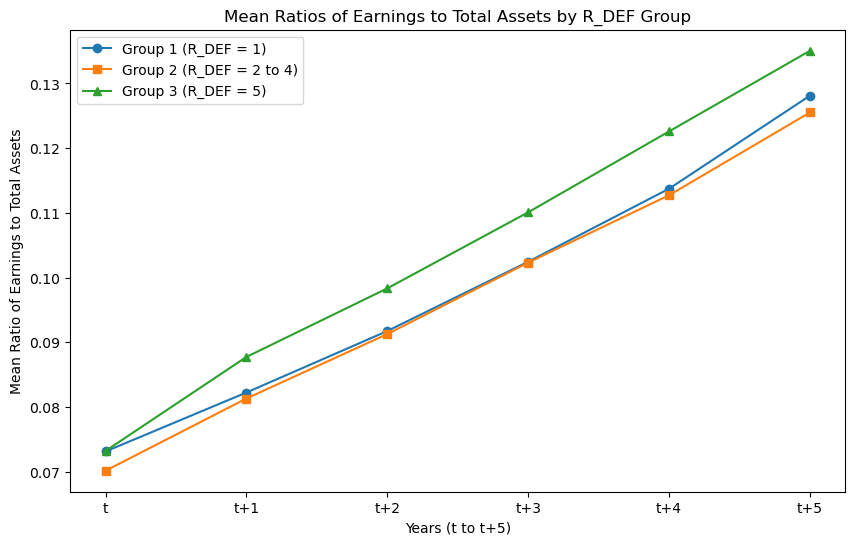

In [98]:
# Plotting the time-series means for R_DEF

# Preparing the x-axis labels for years t to t+5
years_extended = np.arange(0, 6)  # Years t to t+5
year_labels = ['t', 't+1', 't+2', 't+3', 't+4', 't+5']

# Plotting for R_DEF
plt.figure(figsize=(10, 6))
plt.plot(years_extended, time_series_means_rdef['group_1'], label='Group 1 (R_DEF = 1)', marker='o')
plt.plot(years_extended, time_series_means_rdef['group_2'], label='Group 2 (R_DEF = 2 to 4)', marker='s')
plt.plot(years_extended, time_series_means_rdef['group_3'], label='Group 3 (R_DEF = 5)', marker='^')

plt.xlabel('Years (t to t+5)')
plt.xticks(years_extended, year_labels)  # Adjusting x-axis labels
plt.ylabel('Mean Ratio of Earnings to Total Assets')
plt.title('Mean Ratios of Earnings to Total Assets by R_DEF Group')
plt.legend()
plt.show()


R_CFO


In [93]:
df2=df.dropna(subset=['Operating Cash Flow','CFO'])
df2=df2[(df2['CFO']!=0)]

df2['R_CFO'] = df2.groupby(['sic', 'fyear'])['CFO'].transform(assign_rating)

In [95]:
tmp3=df2[['GVKEY', 'fyear', 'Total Asset', 'Income Before Extraordinary Items', 'R_CFO']].copy()
tmp3.to_csv('/Users/mac/Downloads/tax33.csv')

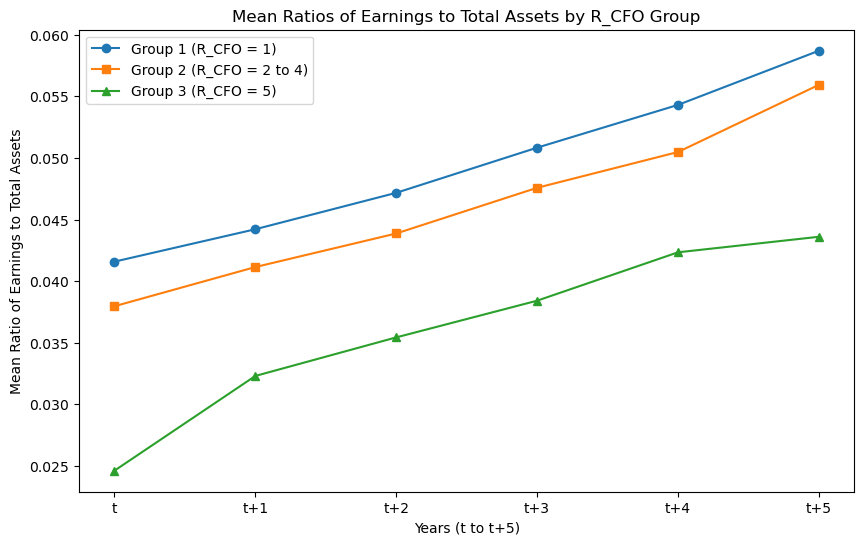

In [99]:
# Analysis for R_CFO

# Filter years within the specified range (1973-2000) for R_CFO dataset
filtered_dataset_r_cfo =tmp3[(tmp3['fyear'] >= 1973) & (tmp3['fyear'] <= 2000)]

# Prepare a dictionary to hold the calculated ratios for each group and each year for R_CFO
grouped_ratios_r_cfo = {
    'group_1': {}, # R_CFO = 1
    'group_2': {}, # R_CFO = 2 to 4
    'group_3': {}  # R_CFO = 5
}

# Iterate over each year in the range for R_CFO
for year in range(1973, 2001):
    # Filter the dataset for the current year
    current_year_data = filtered_dataset_r_cfo[filtered_dataset_r_cfo['fyear'] == year]

    # Divide into groups based on R_CFO
    group_1_data = current_year_data[current_year_data['R_CFO'] == 1]
    group_2_data = current_year_data[(current_year_data['R_CFO'] >= 2) & (current_year_data['R_CFO'] <= 4)]
    group_3_data = current_year_data[current_year_data['R_CFO'] == 5]

    # Calculate the ratios for each group for t to t+5
    for j in range(6):
        future_year = year + j
        # Ensure future year data is available
        if future_year <= 2000:
            future_data = filtered_dataset_r_cfo[filtered_dataset_r_cfo['fyear'] == future_year]

            # Calculate ratios for each group
            for group, data in [('group_1', group_1_data), ('group_2', group_2_data), ('group_3', group_3_data)]:
                merged_data = pd.merge(data, future_data, on='GVKEY', suffixes=('', '_future'))
                ratio = merged_data['Income Before Extraordinary Items_future'] / merged_data['Total Asset']
                mean_ratio = ratio.mean()

                # Store the mean ratio
                if year not in grouped_ratios_r_cfo[group]:
                    grouped_ratios_r_cfo[group][year] = []
                grouped_ratios_r_cfo[group][year].append(mean_ratio)

# Compute the time-series mean for each group and each year for R_CFO
time_series_means_r_cfo = {
    'group_1': np.zeros(6),
    'group_2': np.zeros(6),
    'group_3': np.zeros(6)
}

for group in grouped_ratios_r_cfo:
    for year in range(1973, 2001):
        if year in grouped_ratios_r_cfo[group]:
            year_ratios = np.pad(np.nan_to_num(grouped_ratios_r_cfo[group][year], nan=0), 
                                 (0, 6 - len(grouped_ratios_r_cfo[group][year])),
                                 'constant', constant_values=0)
            time_series_means_r_cfo[group] += year_ratios

for group in time_series_means_r_cfo:
    time_series_means_r_cfo[group] /= 28  # Number of years in the range

# Plotting the time-series means for R_CFO
years_extended = np.arange(0, 6)  # Years t to t+5
year_labels = ['t', 't+1', 't+2', 't+3', 't+4', 't+5']

plt.figure(figsize=(10, 6))
plt.plot(years_extended, time_series_means_r_cfo['group_1'], label='Group 1 (R_CFO = 1)', marker='o')
plt.plot(years_extended, time_series_means_r_cfo['group_2'], label='Group 2 (R_CFO = 2 to 4)', marker='s')
plt.plot(years_extended, time_series_means_r_cfo['group_3'], label='Group 3 (R_CFO = 5)', marker='^')

plt.xlabel('Years (t to t+5)')
plt.xticks(years_extended, year_labels)  # Adjusting x-axis labels
plt.ylabel('Mean Ratio of Earnings to Total Assets')
plt.title('Mean Ratios of Earnings to Total Assets by R_CFO Group')
plt.legend()
plt.show()



R_TAX

In [43]:
df0 = df.dropna(subset=['Current Proportion of Income Tax Expense'])
df0=df0.dropna(subset=['TAX'])
df0 = df0[(df0['TAX'] != 0)]

# Calculating R_TAX
df0['R_TAX'] = df0.groupby('sic')['TAX'].transform(assign_rating)


/var/folders/3l/khm41zw565j7h70nnhv80s580000gn/T/ipykernel_888/629082008.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df0['TAX'] = ((df0['Current Proportion of Income Tax Expense'] / df0['Federal Tax Rate']) * (1 - df0['Federal Tax Rate'])) / df0['Income Before Extraordinary Items'].replace(0, pd.NA)


In [44]:
tmp1=df0[['GVKEY', 'fyear', 'Total Asset', 'Income Before Extraordinary Items', 'R_TAX']].copy()
tmp1

,GVKEY,fyear,Total Asset,Income Before Extraordinary Items,R_TAX
0,1004,1973,31.584,2.105,2.0
1,1004,1974,43.353,1.866,2.0
2,1004,1975,43.539,1.860,2.0
3,1004,1976,45.550,1.801,2.0
4,1004,1977,56.502,2.015,2.0
...,...,...,...,...,...
25978,222519,2000,2269.090,24.212,5.0
25985,223732,1999,281.729,21.020,5.0
25986,223732,2000,387.604,31.954,5.0
25988,224604,1999,261.387,24.063,1.0


In [74]:
dataset=tmp1.copy()

In [75]:
# Starting with the first step: Dividing the sample into three groups and calculating the required ratios

# Filter years within the specified range (1973-2000)
filtered_dataset = dataset[(dataset['fyear'] >= 1973) & (dataset['fyear'] <= 2000)]

# Prepare a dictionary to hold the calculated ratios for each group and each year
grouped_ratios = {
    'group_1': {}, # R_TAX = 1
    'group_2': {}, # R_TAX = 2 to 4
    'group_3': {}  # R_TAX = 5
}

# Iterate over each year in the range
for year in range(1973, 2001):
    # Filter the dataset for the current year
    current_year_data = filtered_dataset[filtered_dataset['fyear'] == year]

    # Divide into groups based on R_TAX
    group_1_data = current_year_data[current_year_data['R_TAX'] == 1]
    group_2_data = current_year_data[(current_year_data['R_TAX'] >= 2) & (current_year_data['R_TAX'] <= 4)]
    group_3_data = current_year_data[current_year_data['R_TAX'] == 5]

    # Calculate the ratios for each group for t to t+5
    for j in range(6):
        future_year = year + j
        # Ensure future year data is available
        if future_year <= 2000:
            future_data = filtered_dataset[filtered_dataset['fyear'] == future_year]

            # Calculate ratios for each group
            for group, data in [('group_1', group_1_data), ('group_2', group_2_data), ('group_3', group_3_data)]:
                merged_data = pd.merge(data, future_data, on='GVKEY', suffixes=('', '_future'))
                ratio = merged_data['Income Before Extraordinary Items_future'] / merged_data['Total Asset']
                mean_ratio = ratio.mean()

                # Store the mean ratio
                if year not in grouped_ratios[group]:
                    grouped_ratios[group][year] = []
                grouped_ratios[group][year].append(mean_ratio)

# Check the first few entries to ensure the data is structured correctly
for group, data in grouped_ratios.items():
    print(f"{group}: {list(data.items())[:2]}")
    print('---')  # Separator for clarity


group_1: [(1973, [0.05604957187731445, 0.07893240062655275, 0.08558825932476023, 0.10795138044720984, 0.11513877495767852, 0.13836294923119064]), (1974, [0.048276748218196636, 0.05759114443805322, 0.082466420538447, 0.0910189364668919, 0.10706572596984414, 0.13511084181372995])]
---
group_2: [(1973, [0.07591401456557142, 0.08816169056473426, 0.0928898702981082, 0.11983513809425869, 0.13940738283135223, 0.1679285460030761]), (1974, [0.07794265966527285, 0.08217910979801499, 0.10281649370090018, 0.11859138923447646, 0.14496274609839277, 0.17818532772425635])]
---
group_3: [(1973, [0.06200299481406195, 0.09101247966799723, 0.09543379442139288, 0.1264832484467386, 0.16671481867552182, 0.2083166025893823]), (1974, [0.06212682351798691, 0.0801606061763381, 0.09846785987472628, 0.1315606082203068, 0.16174748132656197, 0.1866300749736351])]
---


In [77]:
import numpy as np
# Correct the code to handle years with missing data
for group in grouped_ratios:
    for year in range(1973, 2001):
        if year in grouped_ratios[group]:
            # Get the ratios for the year, pad with zeros if less than 6 values
            year_ratios = np.pad(np.nan_to_num(grouped_ratios[group][year], nan=0), 
                                 (0, 6 - len(grouped_ratios[group][year])),
                                 'constant', constant_values=0)
            # Accumulate the mean ratios for each year
            time_series_means[group] += year_ratios

# Divide by the number of years to get the average
for group in time_series_means:
    time_series_means[group] /= 28  # Number of years in the range

# Display the time-series means for each group
time_series_means



{'group_1': array([0.11116943, 0.13502924, 0.16342134, 0.18603074, 0.20651409,
        0.23040157]),
 'group_2': array([0.081081  , 0.09055807, 0.10106476, 0.11323565, 0.12586434,
        0.14220396]),
 'group_3': array([0.05828559, 0.07730558, 0.08536801, 0.09515239, 0.103529  ,
        0.11220536])}

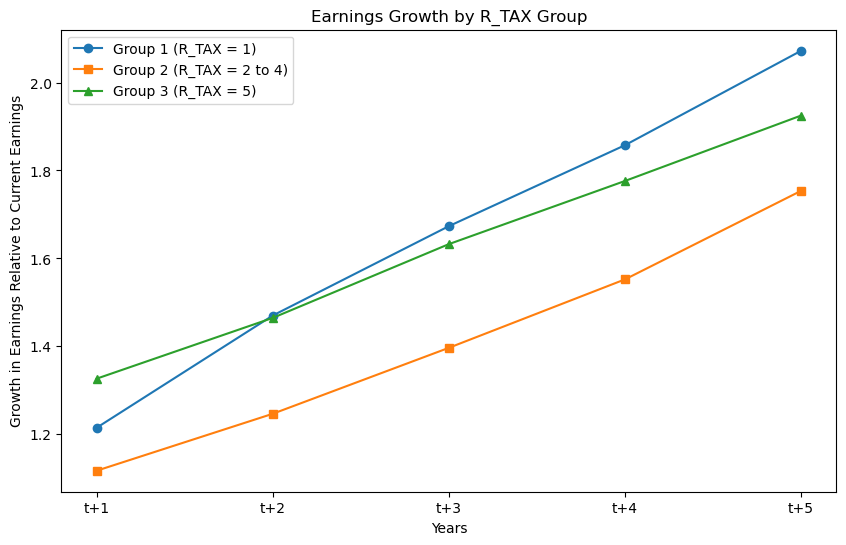

In [82]:
# Adjusting the plot according to the new specifications
# Removing the grid and adjusting the x-axis labels to show 't', 't+1', etc.

plt.figure(figsize=(10, 6))
plt.plot(years, growth_group_1, label='Group 1 (R_TAX = 1)', marker='o')
plt.plot(years, growth_group_2, label='Group 2 (R_TAX = 2 to 4)', marker='s')
plt.plot(years, growth_group_3, label='Group 3 (R_TAX = 5)', marker='^')

plt.xlabel('Years')
plt.xticks(years, ['t+1', 't+2', 't+3', 't+4','t+5'])  # Adjusting x-axis labels
plt.ylabel('Growth in Earnings Relative to Current Earnings')
plt.title('Earnings Growth by R_TAX Group')
plt.legend()
plt.show()


In [45]:
tmp1.to_csv('/Users/mac/Downloads/tax11.csv')

In [24]:
df0['TAX'] = ((df0['Current Proportion of Income Tax Expense'] / df0['Federal Tax Rate']) * (1 - df0['Federal Tax Rate'])) / df0['Income Before Extraordinary Items'].replace(0, pd.NA)
df0['DEF'] = -df0['Deferred Taxes'] /df0['Total Asset'].replace(0, pd.NA)
df0['CFO'] = df0['Operating Cash Flow'] / df0['Income Before Extraordinary Items'].replace(0, pd.NA)


/var/folders/3l/khm41zw565j7h70nnhv80s580000gn/T/ipykernel_888/3824838905.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df0['TAX'] = ((df0['Current Proportion of Income Tax Expense'] / df0['Federal Tax Rate']) * (1 - df0['Federal Tax Rate'])) / df0['Income Before Extraordinary Items'].replace(0, pd.NA)
/var/folders/3l/khm41zw565j7h70nnhv80s580000gn/T/ipykernel_888/3824838905.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df0['DEF'] = -df0['Deferred Taxes'] /df0['Total Asset'].replace(0, pd.NA)
/v

Model 1

In [6]:
df_filtered = df.dropna(subset=['TAX', 'DEF', 'CFO'])
df_filtered = df_filtered[(df_filtered['TAX'] != 0) & (df_filtered['DEF'] != 0) & (df_filtered['CFO'] != 0)]

In [9]:
df_filtered['R_TAX'] = df_filtered.groupby('sic')['TAX'].transform(assign_rating)
df_filtered['R_DEF'] = df_filtered.groupby(['sic', 'fyear'])['DEF'].transform(assign_rating)
df_filtered['R_CFO'] = df_filtered.groupby(['sic', 'fyear'])['CFO'].transform(assign_rating)

In [11]:
import pandas as pd

# Assuming 'data' is your DataFrame and it contains columns 'R_TAX', 'R_DEF', 'R_CFO'
# Calculate the 0.5th and 99.5th percentiles for each variable
percentiles = df_filtered[['R_TAX', 'R_DEF', 'R_CFO']].quantile([0.005, 0.995]).to_dict()

# Filter out the observations where any R variable is outside the specified range
data1 = df_filtered[
    (df_filtered['R_TAX'] >= percentiles['R_TAX'][0.005]) & (df_filtered['R_TAX'] <= percentiles['R_TAX'][0.995]) &
    (df_filtered['R_DEF'] >= percentiles['R_DEF'][0.005]) & (df_filtered['R_DEF'] <= percentiles['R_DEF'][0.995]) &
    (df_filtered['R_CFO'] >= percentiles['R_CFO'][0.005]) & (df_filtered['R_CFO'] <= percentiles['R_CFO'][0.995])
]


In [212]:
d1= data_sorted[data_sorted['fyear'] < 1993][['GVKEY','sic','R_TAX', 'R_DEF', 'R_CFO','G1','G2','G3']]
d2 = data_sorted[data_sorted['fyear'] >= 1993][['GVKEY','sic','R_TAX', 'R_DEF', 'R_CFO','G1','G2','G3']]

In [213]:
d1

,GVKEY,sic,R_TAX,R_DEF,R_CFO,G1,G2,G3
16,1004,5080,2.0,1.0,1.0,NaN,NaN,NaN
17,1004,5080,3.0,1.0,5.0,-2.856632,-2.856632,-2.856632
18,1004,5080,3.0,5.0,1.0,-1.209305,-1.977357,-1.977357
39,1045,4512,3.0,2.0,5.0,NaN,NaN,NaN
40,1045,4512,2.0,1.0,5.0,-0.202254,-0.202254,-0.202254
...,...,...,...,...,...,...,...,...
25382,100465,2890,1.0,4.0,2.0,6.492048,6.492048,6.492048
25383,100465,2890,2.0,4.0,4.0,-1.155418,1.809463,1.809463
25384,100465,2890,1.0,2.0,4.0,1.242324,1.401839,1.401839
25455,104831,4813,2.0,2.0,5.0,NaN,NaN,NaN


In [177]:
df_filtered = df_filtered.dropna(subset=['R_TAX', 'R_DEF', 'R_CFO'])

In [12]:
# Sorting the data by GVKEY and fiscal year
data_sorted = data1.sort_values(by=['GVKEY', 'fyear'])

# Calculating the year-over-year change in earnings
data_sorted['Income Change'] = data_sorted.groupby('GVKEY')['Income Before Extraordinary Items'].diff()

# To calculate G2 and G3, we need to compute the rolling averages of the income changes over 3 and 5 years
data_sorted['3yr Avg Income Change'] = data_sorted.groupby('GVKEY')['Income Change'].transform(lambda x: x.rolling(3, min_periods=1).mean())
data_sorted['5yr Avg Income Change'] = data_sorted.groupby('GVKEY')['Income Change'].transform(lambda x: x.rolling(5, min_periods=1).mean())

# Calculating G1, G2, and G3
data_sorted['G1'] = (data_sorted['Income Change'] / data_sorted['Total Asset']) * 100
data_sorted['G2'] = (data_sorted['3yr Avg Income Change'] / data_sorted['Total Asset']) * 100
data_sorted['G3'] = (data_sorted['5yr Avg Income Change'] / data_sorted['Total Asset']) * 100


In [13]:
import statsmodels.api as sm

# Function to perform regression analysis
def perform_regression(data, independent_vars, dependent_var):
    # Preparing the independent and dependent variables
    X = data[independent_vars]
    y = data[dependent_var]

    # Adding a constant to the independent variables
    X = sm.add_constant(X)

    # Handling missing values by dropping rows with NaN in any column
    combined = pd.concat([X, y], axis=1).dropna()

    # Re-separating the independent and dependent variables
    X = combined[independent_vars]
    X = sm.add_constant(X)
    y = combined[dependent_var]

    # Running the regression
    model = sm.OLS(y, X).fit()
    return model.summary()

# Defining the independent variables for separate and combined regressions
independent_vars_separate = ['R_TAX', 'R_DEF', 'R_CFO']
independent_vars_combined = ['R_TAX', 'R_DEF', 'R_CFO']
dependent_vars = ['G1', 'G2', 'G3']

# Storing the regression results
regression_results = {}

for g in dependent_vars:
    regression_results[g] = {}
    for r in independent_vars_separate:
        result = perform_regression(data_sorted, [r], g)
        regression_results[g][f'Regression on {r}'] = result
    combined_result = perform_regression(data_sorted, independent_vars_combined, g)
    regression_results[g]['Combined Regression'] = combined_result



/Users/mac/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [14]:
regression_results

{'G1': {'Regression on R_TAX': <class 'statsmodels.iolib.summary.Summary'>
  """
                              OLS Regression Results                            
  Dep. Variable:                     G1   R-squared:                       0.007
  Model:                            OLS   Adj. R-squared:                  0.006
  Method:                 Least Squares   F-statistic:                     56.93
  Date:                Fri, 08 Dec 2023   Prob (F-statistic):           4.98e-14
  Time:                        13:02:11   Log-Likelihood:                -23123.
  No. Observations:                8606   AIC:                         4.625e+04
  Df Residuals:                    8604   BIC:                         4.627e+04
  Df Model:                           1                                         
  Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
  --------------------------

In [185]:
# Variables for regression
independent_vars_single = ['R_TAX', 'R_DEF', 'R_CFO']
independent_vars_all = independent_vars_single
dependent_vars = ['G1', 'G2', 'G3']


In [152]:
regression_results

{'G1': {'Regression on R_TAX': <class 'statsmodels.iolib.summary.Summary'>
  """
                              OLS Regression Results                            
  Dep. Variable:                     G1   R-squared:                       0.007
  Model:                            OLS   Adj. R-squared:                  0.006
  Method:                 Least Squares   F-statistic:                     56.93
  Date:                Fri, 08 Dec 2023   Prob (F-statistic):           4.98e-14
  Time:                        02:24:59   Log-Likelihood:                -23123.
  No. Observations:                8606   AIC:                         4.625e+04
  Df Residuals:                    8604   BIC:                         4.627e+04
  Df Model:                           1                                         
  Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
  --------------------------

Model 2

In [241]:
df_filtered.columns

Index(['GVKEY', 'datadate', 'fyear', 'Total Asset', 'Common Equity',
       'Common Shares Outstanding', 'Income Before Extraordinary Items',
       'Operating Cash Flow', 'Deferred Federal Taxes',
       'Deferred Foreign Taxes', 'Deferred Income Taxes',
       'Federal Income Taxes', 'Foreign Income Taxes', 'Total Income Taxes',
       'exchg', 'costat', 'prcc_f', 'sic',
       'Current Proportion of Income Tax Expense', 'Deferred Taxes',
       'Federal Tax Rate', 'TAX', 'DEF', 'CFO', 'R_TAX', 'R_DEF', 'R_CFO'],
      dtype='object')

In [242]:
df_return

,caldt,vwretd
0,1973-01-31,-0.027454
1,1973-02-28,-0.044370
2,1973-03-30,-0.007857
3,1973-04-30,-0.051769
4,1973-05-31,-0.024508
...,...,...
595,2022-08-31,-0.036390
596,2022-09-30,-0.092082
597,2022-10-31,0.078679
598,2022-11-30,0.051444


In [240]:
df_return=pd.read_csv('/Users/mac/Downloads/vthlivftu2bylbc0.csv')

In [239]:
m2=pd.merge(df_filtered[['GVKEY', 'datadate', 'fyear', 'Total Asset', 'Common Equity',
       'Common Shares Outstanding', 'Income Before Extraordinary Items','R_TAX', 'R_DEF', 'R_CFO'],])

,GVKEY,datadate,fyear,Total Asset,Common Equity,Common Shares Outstanding,Income Before Extraordinary Items,Operating Cash Flow,Deferred Federal Taxes,Deferred Foreign Taxes,...,sic,Current Proportion of Income Tax Expense,Deferred Taxes,Federal Tax Rate,TAX,DEF,CFO,R_TAX,R_DEF,R_CFO
15,1004,5/31/89,1988,356.391,171.580,16.009,24.814,0.094,NaN,NaN,...,5080,4.740,7.790,0.34,0.370806,-0.021858,0.003788,1.0,NaN,NaN
16,1004,5/31/90,1989,388.521,189.548,16.082,25.655,19.371,NaN,NaN,...,5080,7.140,5.840,0.34,0.540246,-0.015031,0.755057,2.0,1.0,1.0
17,1004,5/31/91,1990,379.958,193.778,15.891,14.801,36.891,NaN,NaN,...,5080,6.340,0.170,0.34,0.831502,-0.000447,2.492467,3.0,1.0,5.0
18,1004,5/31/92,1991,395.351,196.737,15.899,10.020,8.814,NaN,NaN,...,5080,5.400,-2.700,0.34,1.046143,0.006829,0.879641,3.0,5.0,1.0
19,1004,5/31/93,1992,365.151,189.216,15.901,0.283,16.806,NaN,NaN,...,5080,0.030,-2.230,0.34,0.205778,0.006107,59.385159,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25978,222519,12/31/00,2000,2269.090,932.833,106.251,24.212,165.136,NaN,NaN,...,2040,15.428,-13.190,0.35,1.183380,0.005813,6.820420,5.0,4.0,5.0
25985,223732,12/31/99,1999,281.729,169.439,648.420,21.020,14.564,NaN,-6.407,...,7372,24.848,-6.745,0.35,2.195351,0.023941,0.692864,5.0,5.0,2.0
25986,223732,12/31/00,2000,387.604,211.690,655.578,31.954,52.920,NaN,-5.349,...,7372,40.882,-13.729,0.35,2.376032,0.035420,1.656131,5.0,5.0,4.0
25988,224604,12/31/99,1999,261.387,139.740,17.383,24.063,20.419,NaN,0.157,...,2340,7.405,1.982,0.35,0.571506,-0.007583,0.848564,2.0,1.0,1.0
